In [1]:
# Task 3: Customer Segmentation / Clustering for eCommerce Dataset

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Merge datasets to create a combined view
customer_transactions = pd.merge(transactions, customers, on='CustomerID')

In [4]:
# Feature Engineering: Aggregate transaction data by customer
customer_features = customer_transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

In [5]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpent', 'TotalTransactions', 'AvgTransactionValue']])

In [15]:
# Determine the optimal number of clusters using the Elbow Method
import os
os.environ["OMP_NUM_THREADS"] = "1"

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Choose the optimal number of clusters (e.g., 3 for this example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(scaled_features)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

KMeans(n_clusters=3, n_init=10, random_state=42)

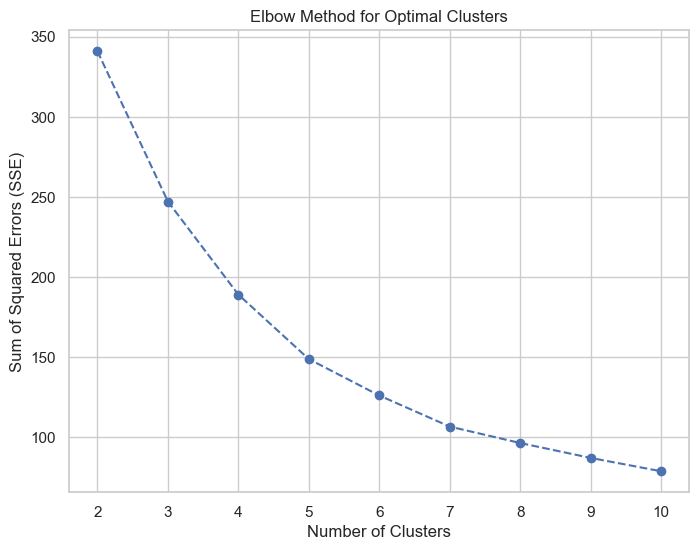

In [16]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [17]:
# Choose the optimal number of clusters (e.g., 3 for this example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [18]:
# Add cluster labels to the dataset
customer_features['Cluster'] = kmeans.labels_

In [19]:
# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9578205962311453


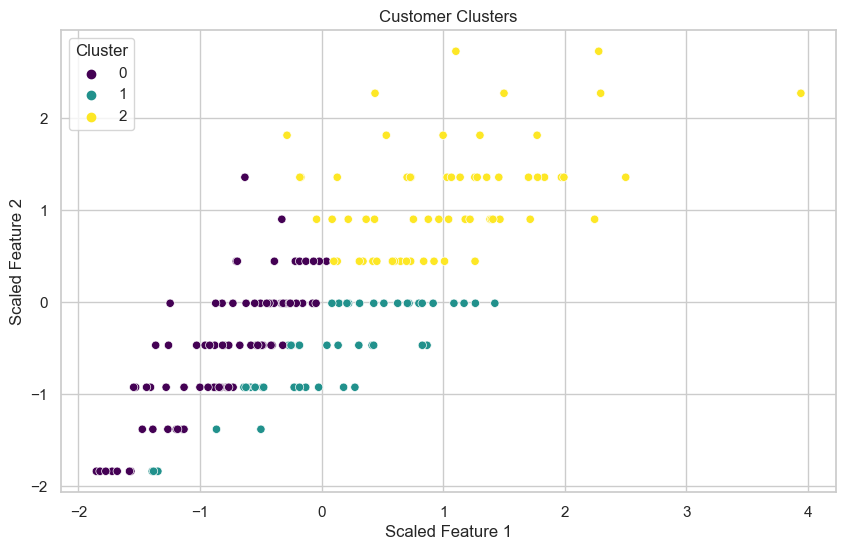

In [20]:
# Visualize the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_features['Cluster'], 
    palette='viridis', 
    legend='full'
)
plt.title('Customer Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend(title='Cluster')
plt.show()

In [21]:
# Save the clustering results
customer_features.to_csv("Customer_Clustering.csv", index=False)

In [22]:
# Display clustering results
print("\nClustering Results:")
print(customer_features.head())


Clustering Results:
  CustomerID  TotalSpent  TotalTransactions  AvgTransactionValue  Cluster
0      C0001     3354.52                  5              670.904        0
1      C0002     1862.74                  4              465.685        0
2      C0003     2725.38                  4              681.345        0
3      C0004     5354.88                  8              669.360        2
4      C0005     2034.24                  3              678.080        0
